### GGOR analytisch

This notebook demonstrate the use of the classes and methods in the module

[ggor_analytical in directory](/Users/Theo/GRWMODELS/python/GGOR/GGOR_analytic/)


In [24]:
import os
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [30]:
from importlib import reload

Add the directory with the module to the python search path
and load the module

In [38]:
GGOR = '/Users/Theo/GRWMODELS/python/GGOR/GGOR_analytic'
import sys

if GGOR not in sys.path:
    sys.path.insert(0, GGOR)

import ggor_analytical as gg
reload(gg)

<module 'ggor_analytical' from '/Users/Theo/GRWMODELS/python/GGOR/GGOR_analytic/ggor_analytical.py'>

Get a meteofile. This one is also in the GGOR directory.

In [26]:
meteofile = os.path.join(GGOR, '../meteo/PE-00-08.txt')

meteo     = gg.get_meteo(meteofile)

Generate sample data that allow to show any behavior pertaining to the solution.

The parametes `N I hLR, q h2` will be headed to or changed in the meteo-dataframe. For this
columns will be changed and or added, using the given names as column headers. Each parameter can have a None, meaning it's ignored, or a 3-tuple showing (`time_shift`, `mean` and `step`). `Time_shift` is the time in steps since the start of the meteo time series where the first change takes place. The `mean` is the mean value of the parameter and `step` is the change of it. The value of the changed parameter will be a repetition of `mean - step`, `mean` and `mean + step` with 30 days interval during the period covered by the index of the meteo data.

In [27]:
time_data = gg.gen_sample_time_data(meteo, interval=120,
                     N = (0, 0, 0),
                     I = None,
                     hLR=(30, 0.3, 0.2),
                     q=(60, 0.0, 0.000),
                     h2=(90, 0.2, 0.15))

Next is to instantiate a parcel of the desired type by calling its class and providing the required properties in a dict.

After which the parcel can be simulated using the time_data, which must include the meteo and the boundary conditions required for the chosen solution.

The simulation results are added to a **copy** of the the provided `time_data`; the original `time_data` is left unaltered. The resulting `time_data` is stored inside the instantiated object. Hence, this object always contains the results of the most recent simulation. All data including the simulation resutls are contained in the `time_data` attribute of the parcel.

In [39]:
# generate solution index pass its properties
parcel1 = gg.L1q(props=gg.properties)
parcel2 = gg.L1qw(props=gg.properties)

# simulate
parcel1.sim(time_data)
parcel2.sim(time_data)

print("")

We can then plot the input data and the simulation results directly from the `object.time_data` index and columns.

The example below shows the simulated head (bleu) and the water level in the ditches, which is a boundary condition. Notice that in this fist example we set the recharge to zero, so that we only see the effect of the initial and boundary conditions. This solution, which except only `recharge`, `hLR` and given seepage from the regional aquifer `q` as its boundary conditions, ignores the specified regional head in the second aquifer `h`. Because the seepage was zet to zero, it showsn only the effect of the ditch boundary condition. It does so over the full period of the `index` of the `time_data`.

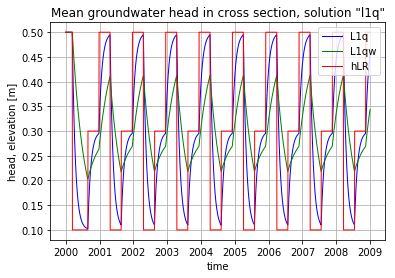

In [40]:
# This shows that both solutions yield the same values of w == 0.
fig, ax = plt.subplots()
ax.set_title('Mean groundwater head in cross section, solution "l1q"')
ax.set_xlabel('time')
ax.set_ylabel('head, elevation [m]')
ax.grid()
ax.plot(parcel1.time_data.index, parcel1.time_data['h1'], 'b', lw=1, label=parcel1.solution_name)
ax.plot(parcel2.time_data.index, parcel2.time_data['h1'], 'g', lw=1, label=parcel2.solution_name)
ax.plot(parcel1.time_data.index, parcel1.time_data['hLR'], 'r', lw=1, label='hLR')
ax.legend()
plt.show()

In [41]:
time_data.columns

Index(['P', 'E', 'N', 'hLR', 'q', 'h2'], dtype='object')